In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#User DataFrame Evaluations

In [2]:
user_df = pd.read_csv("user_info.csv", index_col="User_id").sort_index()

user_df["User_city"] = user_df["User_city"].str.lower()
user_df["User_province"] = user_df["User_province"].str.lower()

user_df["User_city"] = user_df["User_city"].astype("category")
user_df["User_province"] = user_df["User_province"].astype("category")
user_df.info()
user_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   User_city      200 non-null    category
 1   User_province  200 non-null    category
 2   User_age       200 non-null    int64   
dtypes: category(2), int64(1)
memory usage: 6.1 KB


,User_city,User_province,User_age
User_id,,,
1,tabriz,east azerbaijan,42
2,amol,mazandaran,34
3,ahvaz,khuzestan,45
4,karaj,alborz,28
5,shiraz,fars,37


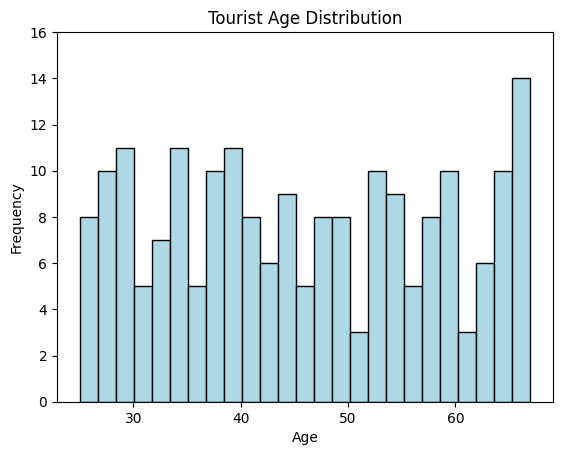

In [3]:
# @title User_age

from matplotlib import pyplot as plt
user_df['User_age'].plot(kind='hist', bins=25, title='User age', color='lightblue', edgecolor='black')
plt.ylim(top=16)
# plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Tourist Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

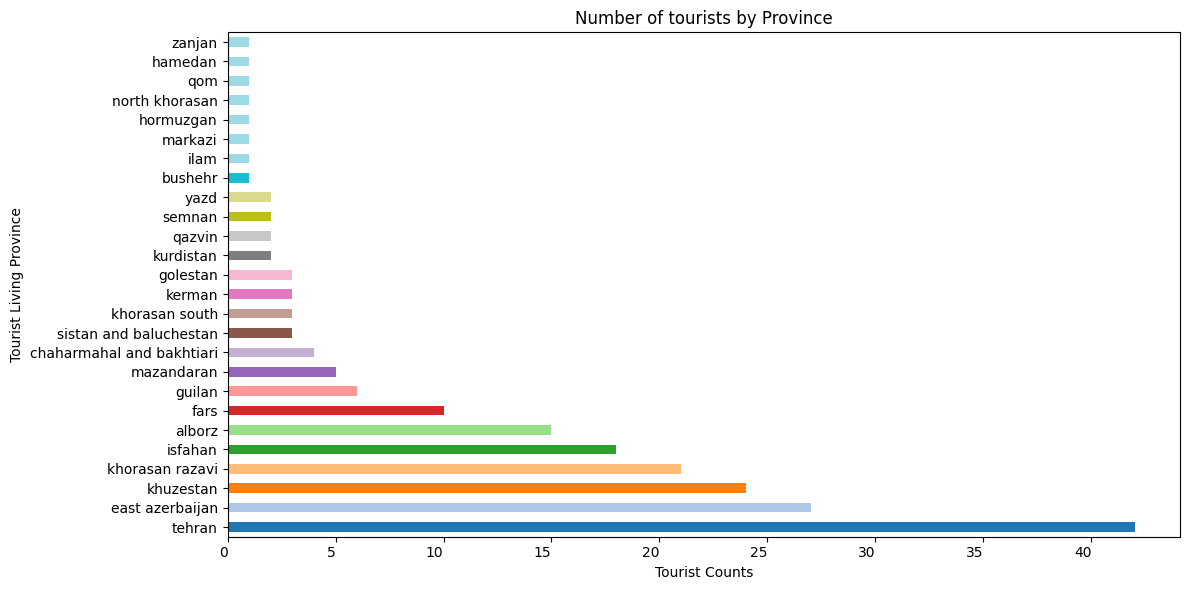

In [4]:
# Create a bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
user_counts = user_df['User_province'].value_counts()
user_counts.plot(kind='barh',color=plt.cm.tab20(range(len(user_counts))))
plt.xlabel('Tourist Counts')
plt.ylabel('Tourist Living Province')
plt.title('Number of tourists by Province')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

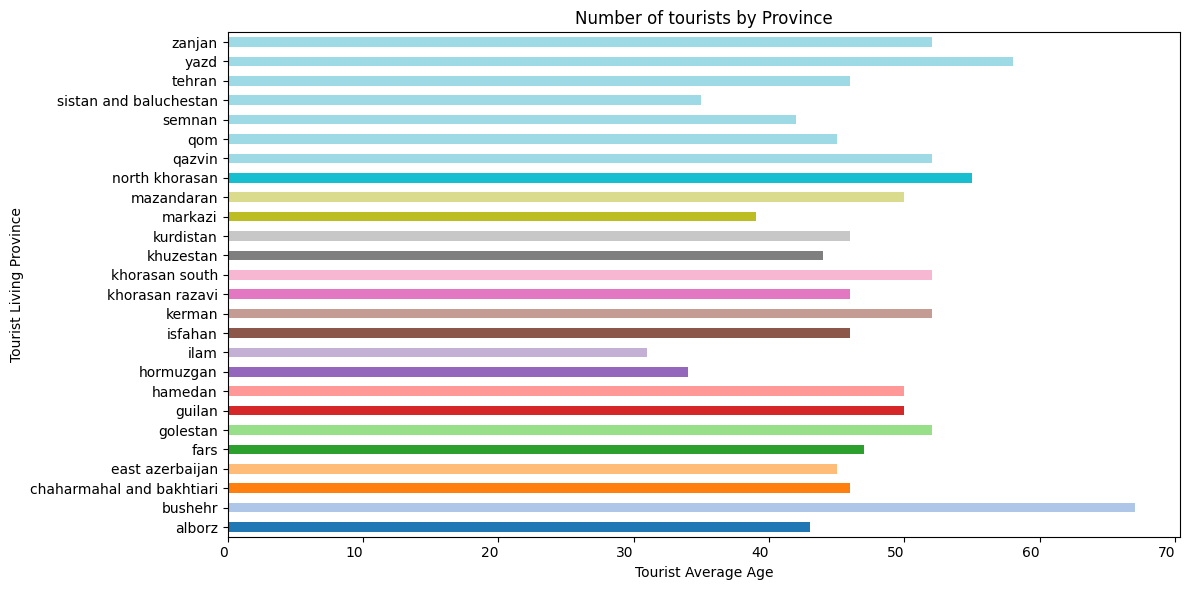

In [5]:
# Create a bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
user_age_avg = user_df.groupby(by="User_province")["User_age"].mean().round(0)
user_age_avg.plot(kind='barh', color=plt.cm.tab20(range(len(user_counts))))
plt.xlabel('Tourist Average Age')
plt.ylabel('Tourist Living Province')
plt.title('Number of tourists by Province')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

# Landmark DataFrame Evaluations

In [6]:
landmark_df = pd.read_csv("landmark_info.csv", index_col="Place_id").sort_index()

landmark_df["Place_name"] = landmark_df["Place_name"].str.lower()
landmark_df["Place_city"] = landmark_df["Place_city"].str.lower()
landmark_df["Place_province"] = landmark_df["Place_province"].str.lower()

landmark_df["Place_name"] = landmark_df["Place_name"].astype("category")
landmark_df["Place_city"] = landmark_df["Place_city"].astype("category")
landmark_df["Place_province"] = landmark_df["Place_province"].astype("category")
landmark_df.info()

landmark_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 309 entries, 1 to 309
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Place_name      309 non-null    category
 1   Place_category  309 non-null    object  
 2   Place_city      309 non-null    category
 3   Place_province  309 non-null    category
 4   Place_price     309 non-null    int64   
dtypes: category(3), int64(1), object(1)
memory usage: 25.3+ KB


,Place_name,Place_category,Place_city,Place_province,Place_price
Place_id,,,,,
1,meighan wetland,Natural,arak,markazi,0
2,four seasons bathhouse,Cultural,arak,markazi,20000
3,arak bazaar,Cultural,arak,markazi,0
4,soltan abad (shazand) caravanserai,Historical,qazvin,qazvin,30000
5,sepahdar school,Cultural,arak,markazi,5000


Text(0.5, 1.0, 'Number of Landmarks by Category')

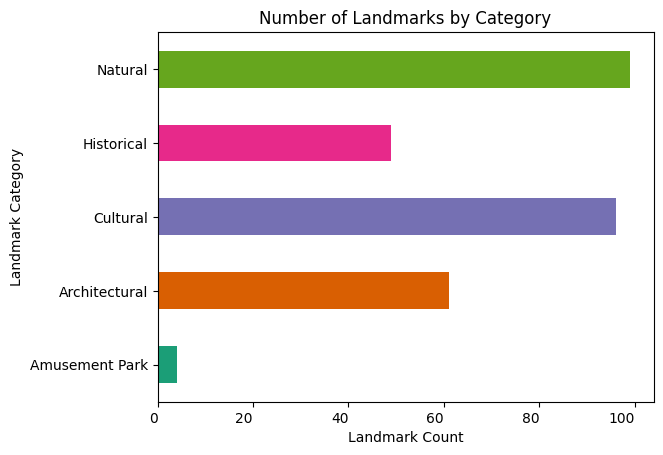

In [7]:
landmark_df.groupby('Place_category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for readability
plt.xlabel('Landmark Count')
plt.ylabel('Landmark Category')
plt.title('Number of Landmarks by Category')

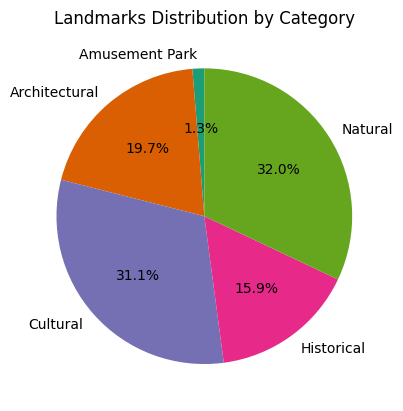

In [8]:
# prompt: please use pie plot
# landmark_df.groupby('Place_category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
# plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for readability
# plt.xlabel('Landmark Count')
# plt.ylabel('Landmark Category')
# plt.title('Number of Landmarks by Category')

import matplotlib.pyplot as plt
landmark_df.groupby('Place_category').size().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.palettes.mpl_palette('Dark2'))
plt.title('Landmarks Distribution by Category')
plt.ylabel('')  # Remove the y-axis label
plt.show()


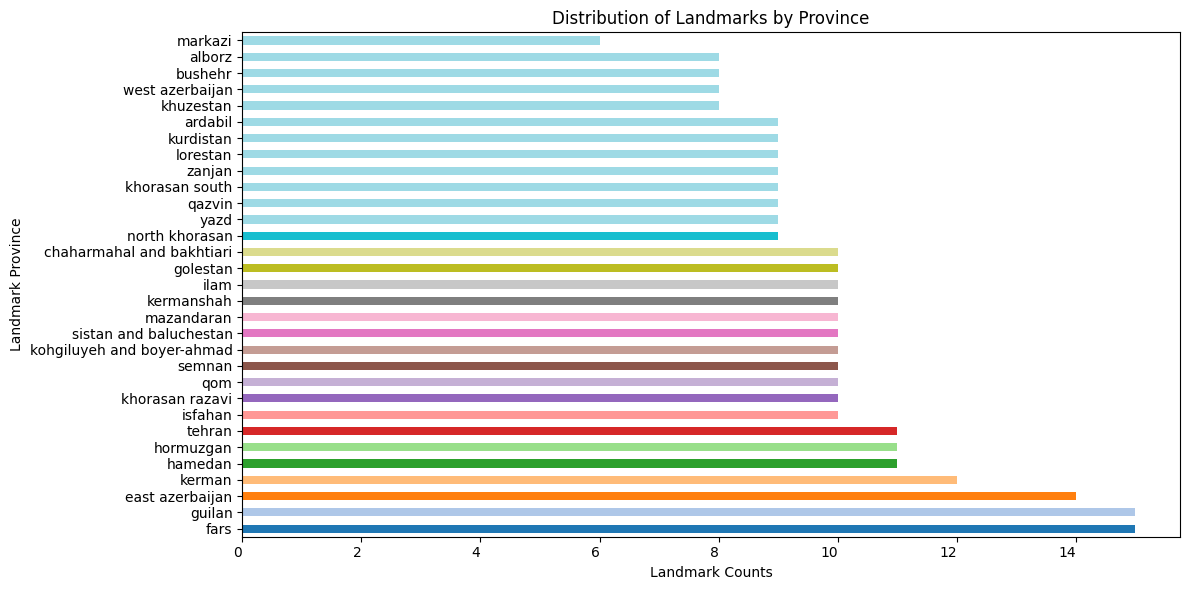

In [9]:
# Create a bar chart
province_counts = landmark_df['Place_province'].value_counts()
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
province_counts.plot(kind='barh',color=plt.cm.tab20(range(len(province_counts))))
plt.xlabel('Landmark Counts')
plt.ylabel('Landmark Province')
plt.title('Distribution of Landmarks by Province')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

Text(0, 0.5, 'Landmark Category')

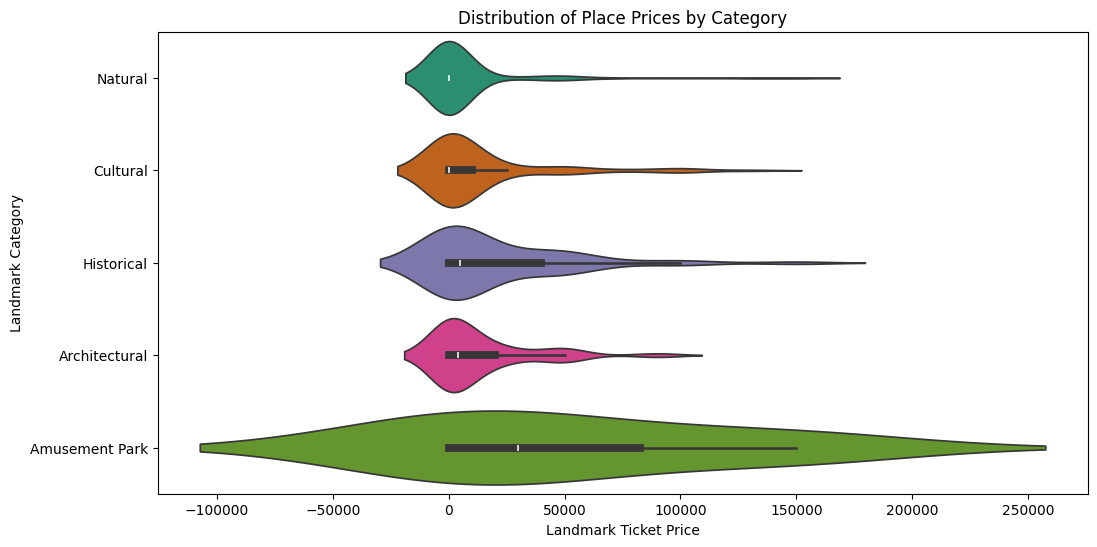

In [10]:
figsize = (12, 1.2 * len(landmark_df['Place_category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(landmark_df, x='Place_price', y='Place_category', inner='box', palette='Dark2')
plt.title('Distribution of Place Prices by Category')
plt.xlabel('Landmark Ticket Price')
plt.ylabel('Landmark Category')
# sns.despine(top=True, right=True, bottom=True, left=True)

In [11]:
landmark_df[landmark_df['Place_price']<0]

,Place_name,Place_category,Place_city,Place_province,Place_price
Place_id,,,,,


In [12]:
rating_df = pd.read_csv("rating_info.csv", index_col=["User_id", "Place_id"]).sort_index()
rating_df.head()

UserPlace_rating
User_id Place_id                  
1       18                       3
        52                       2
        61                       3
        79                       3
        89                       3

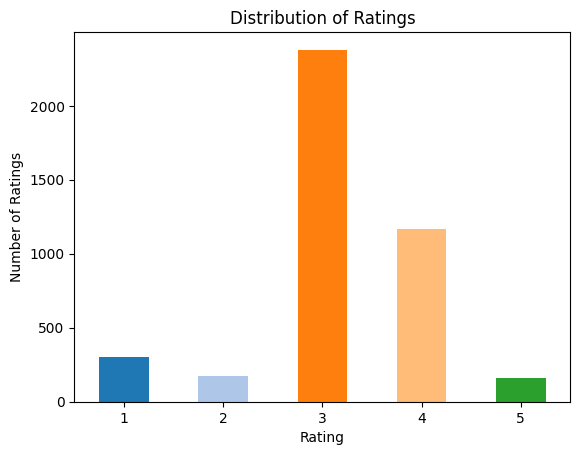

In [13]:
rating_counts = rating_df["UserPlace_rating"].value_counts().sort_index()
rating_counts.plot(kind="bar", color=plt.cm.tab20(range(len(rating_counts))))
plt.xlabel("Rating")
plt.ylabel("Number of Ratings")
plt.title("Distribution of Ratings")
plt.xticks(rotation=0) # Rotate x-axis labels to be horizontal
plt.show()

# Merged DataFrame Evaluations

In [14]:
merged_df = pd.merge(user_df, rating_df, left_index=True, right_index=True)
merged_df = pd.merge(merged_df, landmark_df, left_on="Place_id", right_index=True).sort_index()
merged_df.head()

User_city    User_province  User_age  UserPlace_rating  \
User_id Place_id                                                          
1       18          tabriz  east azerbaijan        42                 3   
        52          tabriz  east azerbaijan        42                 2   
        61          tabriz  east azerbaijan        42                 3   
        79          tabriz  east azerbaijan        42                 3   
        89          tabriz  east azerbaijan        42                 3   

                           Place_name Place_category Place_city  \
User_id Place_id                                                  
1       18               moghan plain        Natural  bilasavar   
        52               vakil bazaar       Cultural     shiraz   
        61          margoon waterfall        Natural    sepidan   
        79        ganjnameh waterfall        Natural    hamedan   
        89              hengam island        Natural     hengam   

                 Place_province  Place_price  
User_id Place_id                              
1       18              ardabil            0  
        52                 fars            0  
        61                 fars            0  
        79              hamedan            0  
        89            hormuzgan        40000

Text(0, 0.5, 'Landmark Category')

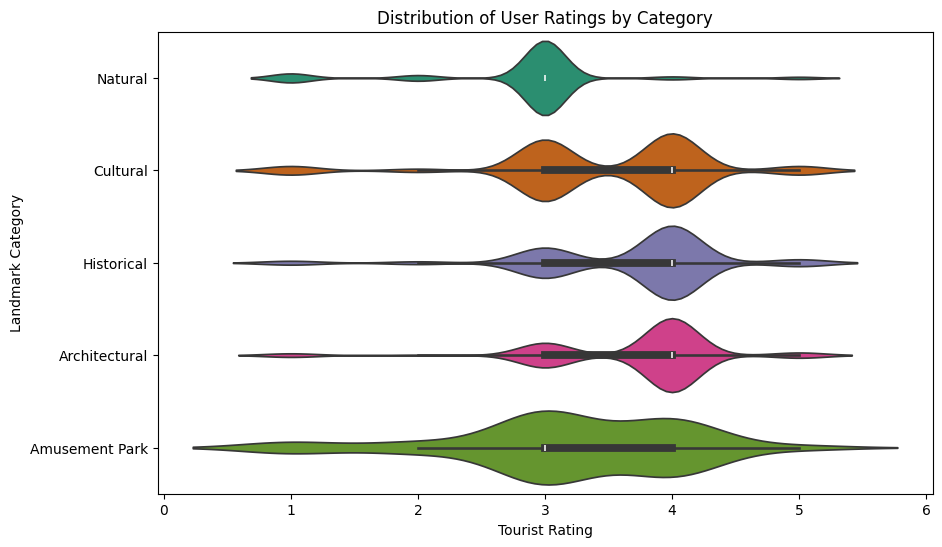

In [15]:
# @title Place_category vs UserPlace_rating

figsize = (10, 1.2 * len(merged_df['Place_category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(merged_df, x='UserPlace_rating', y='Place_category', inner='box', palette='Dark2')
# sns.despine(top=True, right=True, bottom=True, left=True)
plt.title('Distribution of User Ratings by Category')
plt.xlabel('Tourist Rating')
plt.ylabel('Landmark Category')

Text(0, 0.5, 'Landmark Category')

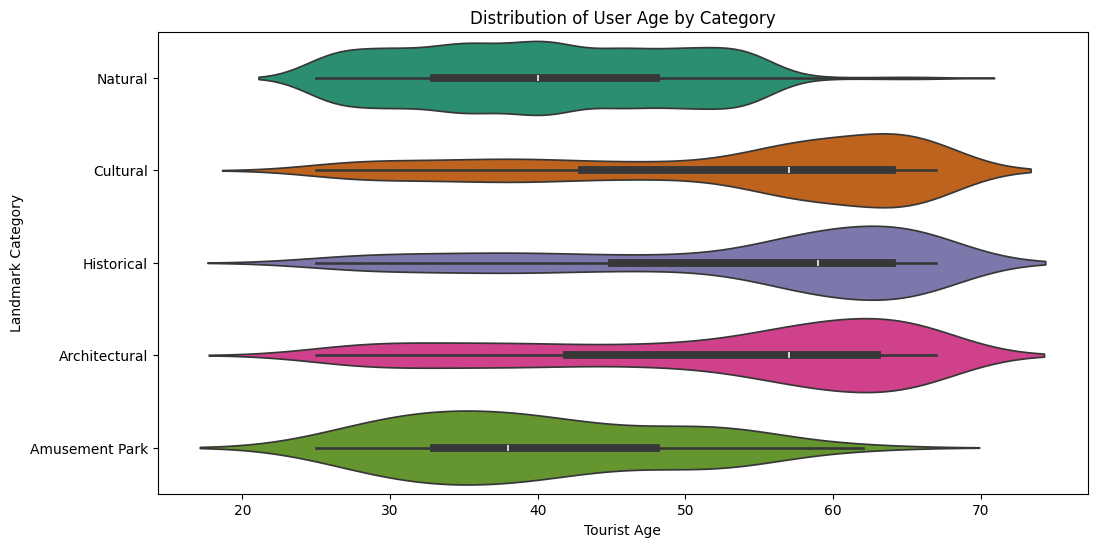

In [16]:
figsize = (12, 1.2 * len(merged_df['Place_category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(merged_df, x='User_age', y='Place_category', inner='box', palette='Dark2')
plt.title('Distribution of User Age by Category')
plt.xlabel('Tourist Age')
plt.ylabel('Landmark Category')
# sns.despine(top=True, right=True, bottom=True, left=True)

In [17]:
# prompt: name the top 10 and the lowest ten rated landmarks also count the number of ratings per each. also include landmark province and city

# Calculate average rating and count of ratings for each landmark
landmark_ratings = merged_df.groupby('Place_name').agg({'UserPlace_rating': ['mean', 'count'], 'Place_province': 'first', 'Place_city': 'first'})
landmark_ratings.columns = ['Average Rating', 'Number of Ratings', 'Province', 'City']

# Sort by average rating to find top 10
top_10_rated = landmark_ratings.sort_values('Average Rating', ascending=False).head(10)

# Sort by average rating to find lowest 10
lowest_10_rated = landmark_ratings.sort_values('Average Rating').head(10)

print("Top 10 Rated Landmarks:\n", top_10_rated)
print("\nLowest 10 Rated Landmarks:\n", lowest_10_rated)


Top 10 Rated Landmarks:
                           Average Rating  Number of Ratings         Province  \
Place_name                                                                     
saint stepanos monastery        4.333333                  3  east azerbaijan   
nasir al-mulk mosque            4.166667                  6             fars   
tomb of hafez                   4.155963                109             fars   
naqsh-e jahan square            4.098214                112          isfahan   
ali qapu palace                 4.067308                104          isfahan   
imam reza shrine                4.067073                164  khorasan razavi   
pasargadae                      4.057143                105             fars   
namak abrud                     4.045455                 22       mazandaran   
si-o-se-pol bridge              4.043011                 93          isfahan   
khaju bridge                    4.029703                101          isfahan   

              

In [18]:
# prompt: name the top 10 and the lowest ten rated landmarks also count the number of ratings per each

# Calculate the average rating and count of ratings for each landmark
landmark_ratings = merged_df.groupby('Place_name')['UserPlace_rating'].agg(['mean', 'count'])

# Sort by average rating in descending order and get the top 10
top_10_rated = landmark_ratings.sort_values('mean', ascending=False).head(10)

# Sort by average rating in ascending order and get the lowest 10
lowest_10_rated = landmark_ratings.sort_values('mean', ascending=True).head(10)

print("Top 10 Rated Landmarks:")
print(top_10_rated)

print("\nLowest 10 Rated Landmarks:")
print(lowest_10_rated)


Top 10 Rated Landmarks:
                              mean  count
Place_name                               
saint stepanos monastery  4.333333      3
nasir al-mulk mosque      4.166667      6
tomb of hafez             4.155963    109
naqsh-e jahan square      4.098214    112
ali qapu palace           4.067308    104
imam reza shrine          4.067073    164
pasargadae                4.057143    105
namak abrud               4.045455     22
si-o-se-pol bridge        4.043011     93
khaju bridge              4.029703    101

Lowest 10 Rated Landmarks:
                            mean  count
Place_name                             
birjand castle          1.666667      3
sar agha seyed village  2.000000      4
qorveh jame mosque      2.000000      3
tchogha zanbil museum   2.000000      2
lahijan tea fields      2.222222      9
green dome              2.333333      3
esfarayen tribal park   2.333333      3
vali castle (ilam)      2.333333      3
falak-ol-aflak castle   2.333333      3
kang

3.171455938697318


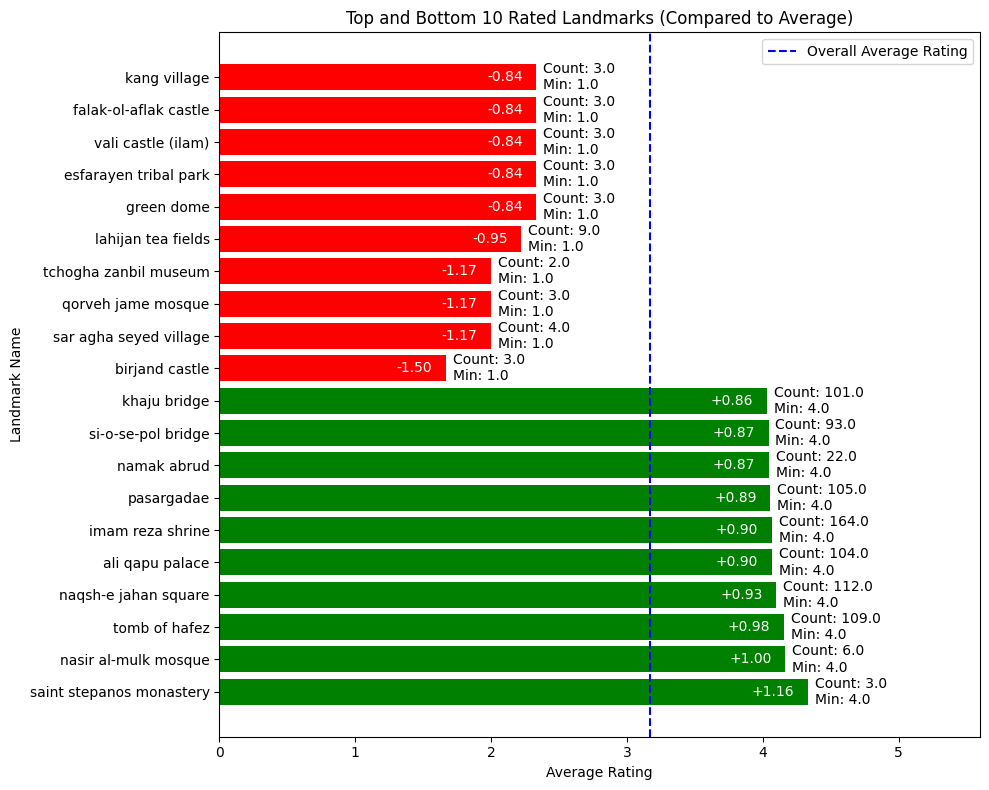

In [19]:
# prompt: please plot lowest and highest rated places compared with average also include number of rates per each and the minimum rate value in plot

# Calculate the average rating and count of ratings for each landmark
landmark_ratings = merged_df.groupby('Place_name')['UserPlace_rating'].agg(['mean', 'count', 'min'])

# Sort by average rating in descending order and get the top 10
top_10_rated = landmark_ratings.sort_values('mean', ascending=False).head(10)

# Sort by average rating in ascending order and get the lowest 10
lowest_10_rated = landmark_ratings.sort_values('mean', ascending=True).head(10)

# Concatenate the top and bottom 10 into a single DataFrame
top_bottom_rated = pd.concat([top_10_rated, lowest_10_rated])

# Calculate the overall average rating
overall_avg_rating = merged_df['UserPlace_rating'].mean()
print(overall_avg_rating)

# Plot the results
plt.figure(figsize=(10, 8))
plt.barh(top_bottom_rated.index, top_bottom_rated['mean'], color=['green' if rating >= overall_avg_rating else 'red' for rating in top_bottom_rated['mean']])
plt.axvline(overall_avg_rating, color='blue', linestyle='--', label='Overall Average Rating')

# Annotate bars with count, minimum rating, and difference from average
for i, (index, row) in enumerate(top_bottom_rated.iterrows()):
    plt.text(row['mean'] + 0.05, i, f"Count: {row['count']}\nMin: {row['min']:.1f}", va='center')
    diff_from_avg = row['mean'] - overall_avg_rating
    plt.text(row['mean'] - 0.1, i, f"{diff_from_avg:+.2f}", va='center', ha='right', color='white')

plt.xlim(0, 5.6)
plt.xlabel('Average Rating')
plt.ylabel('Landmark Name')
plt.title('Top and Bottom 10 Rated Landmarks (Compared to Average)')
plt.legend()
plt.tight_layout()
plt.show()


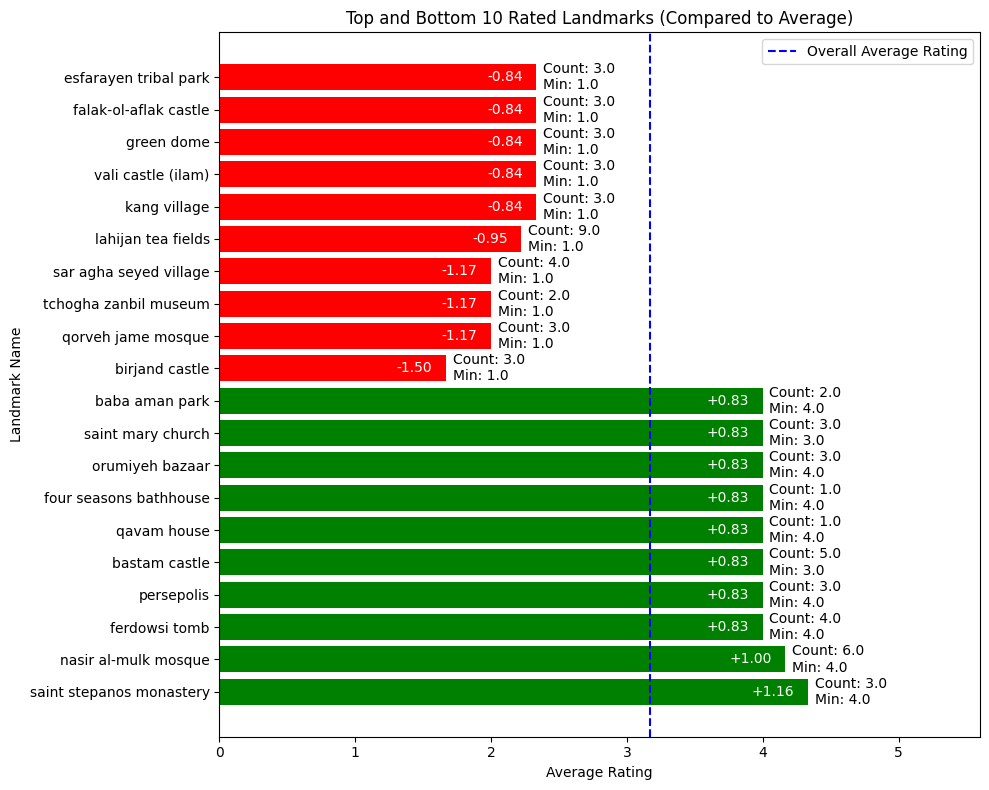

In [20]:
# prompt: please plot lowest and highest rated places (with at least 20 ratings) compared with average also include number of rates per each and the minimum rate value in plot

import pandas as pd
import matplotlib.pyplot as plt
# Calculate the average rating and count of ratings for each landmark
landmark_ratings = merged_df.groupby('Place_name')['UserPlace_rating'].agg(['mean', 'count', 'min'])

# Filter landmarks with at least 20 ratings
landmark_ratings_filtered = landmark_ratings[landmark_ratings['count'] <= 10]

# Sort by average rating in descending order and get the top 10
top_10_rated = landmark_ratings_filtered.sort_values('mean', ascending=False).head(10)

# Sort by average rating in ascending order and get the lowest 10
lowest_10_rated = landmark_ratings_filtered.sort_values('mean', ascending=True).head(10)

# Concatenate the top and bottom 10 into a single DataFrame
top_bottom_rated = pd.concat([top_10_rated, lowest_10_rated])

# Calculate the overall average rating
overall_avg_rating = merged_df['UserPlace_rating'].mean()

# Plot the results
plt.figure(figsize=(10, 8))
plt.barh(top_bottom_rated.index, top_bottom_rated['mean'], color=['green' if rating >= overall_avg_rating else 'red' for rating in top_bottom_rated['mean']])
plt.axvline(overall_avg_rating, color='blue', linestyle='--', label='Overall Average Rating')

# Annotate bars with count, minimum rating, and difference from average
for i, (index, row) in enumerate(top_bottom_rated.iterrows()):
    plt.text(row['mean'] + 0.05, i, f"Count: {row['count']}\nMin: {row['min']:.1f}", va='center')
    diff_from_avg = row['mean'] - overall_avg_rating
    plt.text(row['mean'] - 0.1, i, f"{diff_from_avg:+.2f}", va='center', ha='right', color='white')

plt.xlim(0, 5.6)
plt.xlabel('Average Rating')
plt.ylabel('Landmark Name')
plt.title('Top and Bottom 10 Rated Landmarks (Compared to Average)')
plt.legend()
plt.tight_layout()
plt.show()


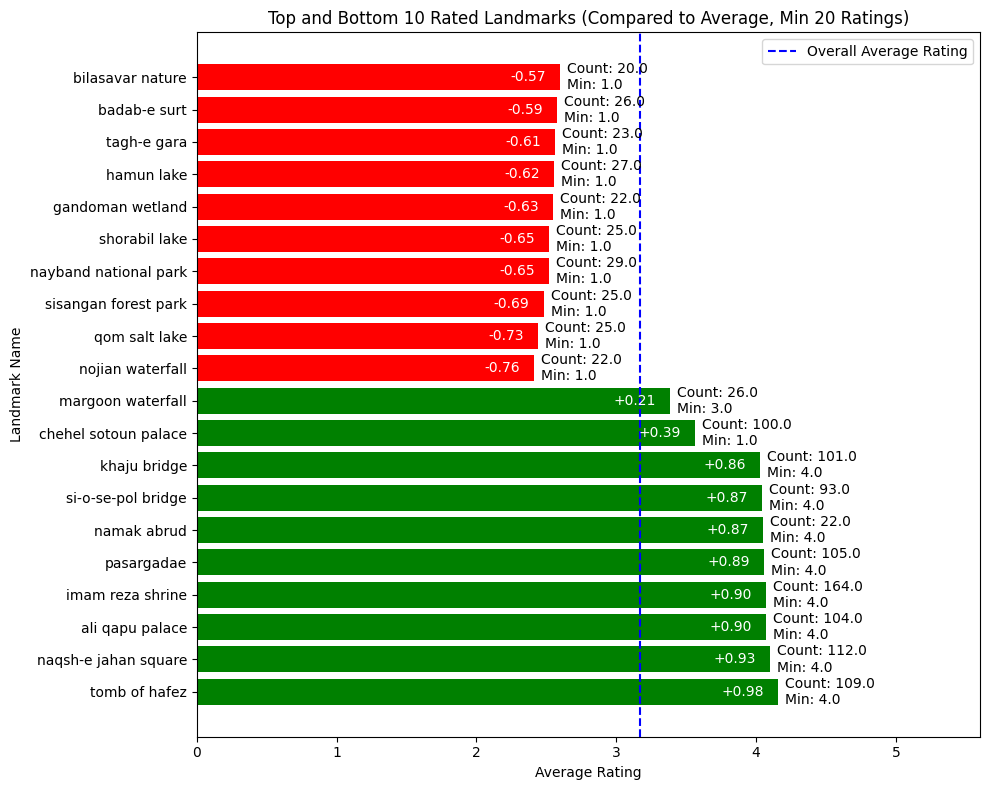

In [21]:
# prompt: please plot lowest and highest rated places (with at least 20 ratings) compared with average also include number of rates per each and the minimum rate value in plot

import pandas as pd
import matplotlib.pyplot as plt
# Calculate the average rating and count of ratings for each landmark
landmark_ratings = merged_df.groupby('Place_name')['UserPlace_rating'].agg(['mean', 'count', 'min'])

# Filter landmarks with at least 20 ratings
landmark_ratings_filtered = landmark_ratings[landmark_ratings['count'] >= 20]

# Sort by average rating in descending order and get the top 10
top_10_rated = landmark_ratings_filtered.sort_values('mean', ascending=False).head(10)

# Sort by average rating in ascending order and get the lowest 10
lowest_10_rated = landmark_ratings_filtered.sort_values('mean', ascending=True).head(10)

# Concatenate the top and bottom 10 into a single DataFrame
top_bottom_rated = pd.concat([top_10_rated, lowest_10_rated])

# Calculate the overall average rating
overall_avg_rating = merged_df['UserPlace_rating'].mean()

# Plot the results
plt.figure(figsize=(10, 8))
plt.barh(top_bottom_rated.index, top_bottom_rated['mean'], color=['green' if rating >= overall_avg_rating else 'red' for rating in top_bottom_rated['mean']])
plt.axvline(overall_avg_rating, color='blue', linestyle='--', label='Overall Average Rating')

# Annotate bars with count, minimum rating, and difference from average
for i, (index, row) in enumerate(top_bottom_rated.iterrows()):
    plt.text(row['mean'] + 0.05, i, f"Count: {row['count']}\nMin: {row['min']:.1f}", va='center')
    diff_from_avg = row['mean'] - overall_avg_rating
    plt.text(row['mean'] - 0.1, i, f"{diff_from_avg:+.2f}", va='center', ha='right', color='white')

plt.xlim(0, 5.6)
plt.xlabel('Average Rating')
plt.ylabel('Landmark Name')
plt.title('Top and Bottom 10 Rated Landmarks (Compared to Average, Min 20 Ratings)')
plt.legend()
plt.tight_layout()
plt.show()


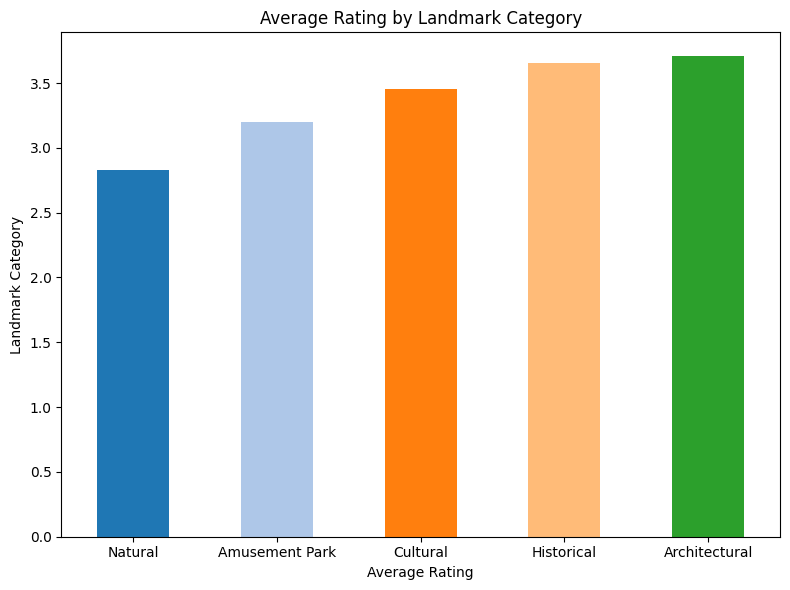

In [22]:
# prompt: create a plot to show what categories have the highest and what categories have the lowest scores

# Calculate average rating for each category
category_ratings = merged_df.groupby('Place_category')['UserPlace_rating'].mean().sort_values()

# Plot the results
plt.figure(figsize=(8, 6))
category_ratings.plot(kind='bar', color=plt.cm.tab20(range(len(category_ratings))))
plt.xlabel('Average Rating')
plt.ylabel('Landmark Category')
plt.title('Average Rating by Landmark Category')
plt.xticks(rotation=0) # Rotate x-axis labels to be horizontal
plt.tight_layout()
plt.show()


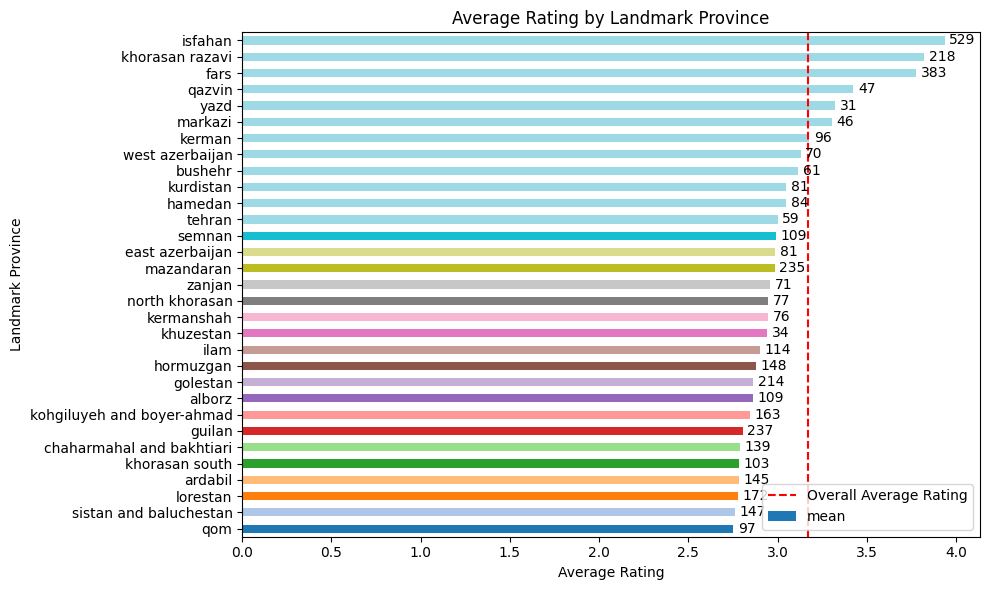

In [23]:
# prompt: create a plot to show the average score of each province using barh
# Also include the number of scores for each province
# Also show the average score

import matplotlib.pyplot as plt
# Calculate average rating and count of ratings for each province
province_ratings = merged_df.groupby('Place_province')['UserPlace_rating'].agg(['mean', 'count']).sort_values('mean')

# Calculate the overall average rating
overall_avg_rating = merged_df['UserPlace_rating'].mean()

# Plot the results using barh
plt.figure(figsize=(10, 6))
province_ratings['mean'].plot(kind='barh', color=plt.cm.tab20(range(len(province_ratings))))
plt.ylabel('Landmark Province')
plt.xlabel('Average Rating')
plt.title('Average Rating by Landmark Province')

# Annotate bars with count of ratings
for i, (province, row) in enumerate(province_ratings.iterrows()):
    plt.text(row['mean'] + 0.025, i, f"{int(row['count'])}", va='center')

# Add a vertical line for the overall average rating
plt.axvline(overall_avg_rating, color='red', linestyle='--', label='Overall Average Rating')
plt.legend()

plt.tight_layout()
plt.show()


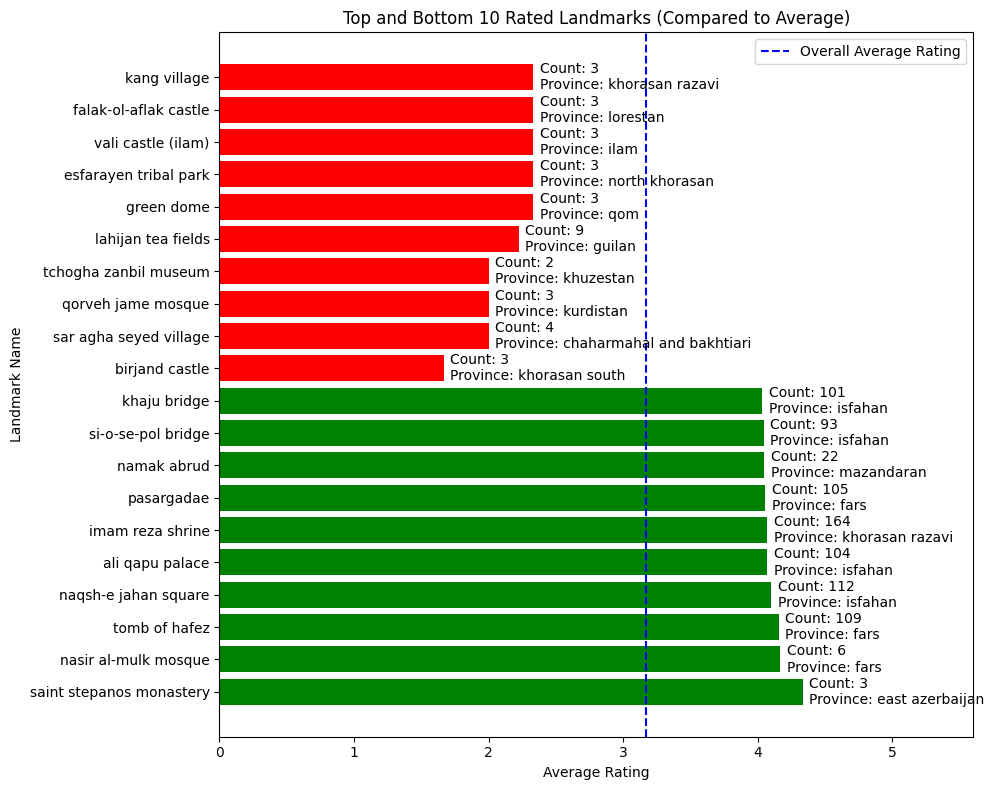

In [24]:
# prompt:  create a plot to show the average score of each place_name using barh
# # Also include the number of scores for each province
# # Also show the average score

# Calculate average rating and count of ratings for each landmark
landmark_ratings = merged_df.groupby('Place_name').agg({'UserPlace_rating': ['mean', 'count'], 'Place_province': 'first'})
landmark_ratings.columns = ['Average Rating', 'Number of Ratings', 'Province']

# Sort by average rating to find top 10
top_10_rated = landmark_ratings.sort_values('Average Rating', ascending=False).head(10)

# Sort by average rating to find lowest 10
lowest_10_rated = landmark_ratings.sort_values('Average Rating').head(10)

# Concatenate the top and bottom 10 into a single DataFrame
top_bottom_rated = pd.concat([top_10_rated, lowest_10_rated])

# Calculate the overall average rating
overall_avg_rating = merged_df['UserPlace_rating'].mean()

# Plot the results
plt.figure(figsize=(10, 8))
plt.barh(top_bottom_rated.index, top_bottom_rated['Average Rating'], color=['green' if rating >= overall_avg_rating else 'red' for rating in top_bottom_rated['Average Rating']])
plt.axvline(overall_avg_rating, color='blue', linestyle='--', label='Overall Average Rating')

# Annotate bars with count and province
for i, (index, row) in enumerate(top_bottom_rated.iterrows()):
    plt.text(row['Average Rating'] + 0.05, i, f"Count: {row['Number of Ratings']}\nProvince: {row['Province']}", va='center')

plt.xlim(0, 5.6)
plt.xlabel('Average Rating')
plt.ylabel('Landmark Name')
plt.title('Top and Bottom 10 Rated Landmarks (Compared to Average)')
plt.legend()
plt.tight_layout()
plt.show()


In [25]:
landmark_ratings = merged_df.groupby('Place_name').agg({'UserPlace_rating': ['mean', 'count'], 'Place_province': 'first'})
landmark_ratings.columns = ['Average Rating', 'Number of Ratings', 'Province']
landmark_ratings.sort_values('Average Rating', ascending=False)
landmark_ratings[landmark_ratings["Number of Ratings"] >= 4].sort_values('Number of Ratings', ascending=False)

,Average Rating,Number of Ratings,Province
Place_name,,,
imam reza shrine,4.067073,164,khorasan razavi
naqsh-e jahan square,4.098214,112,isfahan
tomb of hafez,4.155963,109,fars
pasargadae,4.057143,105,fars
ali qapu palace,4.067308,104,isfahan
...,...,...,...
isfahan music museum,3.000000,4,isfahan
ilam petroglyphs,3.000000,4,ilam
robat sharaf caravanserai,3.000000,4,khorasan razavi
